In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import *

import os
os.chdir(".")
from VAE_VGG_model import VAE
from visualization import plot_latent_prediction


In [2]:
# data_path = '/home/jut6nm/PARC/Data/Processed_data/single_void_state/'
state_traj = np.load(data_path + 'state_160_256_20ts.npy')
state_traj.shape

(119, 160, 256, 3, 20)

In [3]:
# rescale the data to the interval [0,1]
state_traj = (state_traj / 2) + .5

In [4]:
n_samples = 110
f = 0
temp_img_train = [state_traj[:n_samples,:,:,f:f+1,t] for t in range(state_traj.shape[4])]
temp_img_train = np.concatenate(temp_img_train, axis=0)
temp_img_train.shape

(200, 160, 256, 1)

In [22]:
vae = VAE()
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000001, beta_1 = 0.9, beta_2 = 0.999))
vae.fit(temp_img_train, epochs=5, batch_size=32)

Epoch 1/5


2024-02-13 08:57:28.444850: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2205b02950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-13 08:57:28.444884: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-02-13 08:57:28.540388: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-13 08:57:29.313377: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/69 [==============================] - 66s 527ms/step - loss: 81588.8113 - reconstruction_loss: 49884.4609 - kl_loss: 587.1115
Epoch 2/5
69/69 [==============================] - 14s 207ms/step - loss: 770599.1760 - reconstruction_loss: 1312531.5000 - kl_loss: 3688.1218
Epoch 3/5
69/69 [==============================] - 14s 207ms/step - loss: 51280.0932 - reconstruction_loss: 37620.5898 - kl_loss: 101.3647
Epoch 4/5
69/69 [==============================] - 14s 207ms/step - loss: 49388.0373 - reconstruction_loss: 36674.4023 - kl_loss: 107.5286
Epoch 5/5
69/69 [==============================] - 14s 207ms/step - loss: 46321.1070 - reconstruction_loss: 33970.1562 - kl_loss: 281.7603


In [10]:
vae = VAE()
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000001, beta_1 = 0.9, beta_2 = 0.999))
vae.encoder.load_weights('./NN_weights/VAE_VGG/encoder_vgg.h5')
vae.decoder.load_weights('./NN_weights/VAE_VGG/decoder_vgg.h5')

2024-02-13 08:48:20.237077: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78791 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


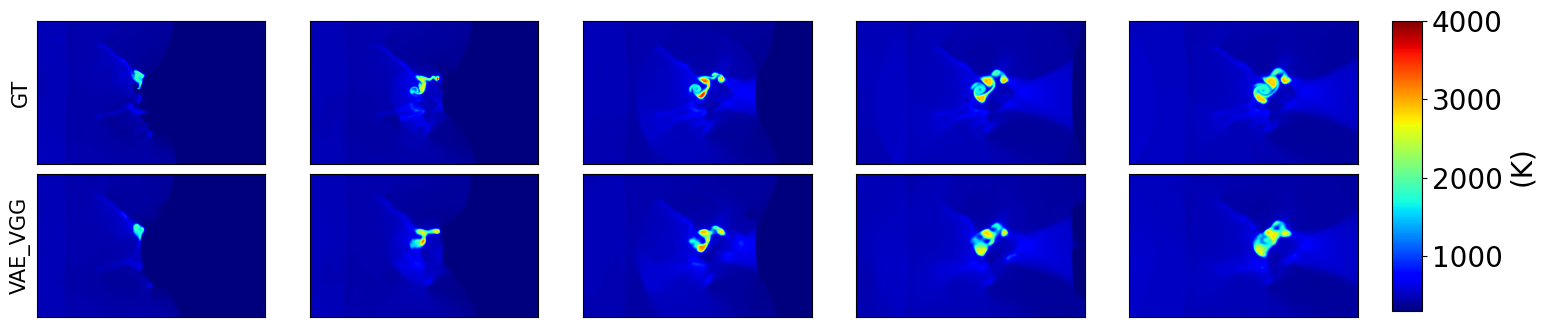

In [19]:
# VAE reconstruction
sample = 50
field_gt = np.moveaxis(state_traj[sample,:,:,0:1,:], [0,1,2,3], [1,2,3,0]) 
pred = vae.predict(field_gt)
vae_fig = plot_latent_prediction(pred, 'temperature', 5)
plt.savefig('../Result/VAE_VGG/train_2-1'+'.png')